In [1]:
from statsmodels.tsa.stattools import adfuller
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv("New Data.csv")

In [3]:
dataset.shape[0]

43

In [4]:
dataset = dataset["Your average cycle length (after how many days your period reoccur) example: 28,30"]

In [5]:
dataset1 = dataset.iloc[0:27]
dataset1

0     28
1     29
2     28
3     29
4     29
5     28
6     29
7     28
8     27
9     30
10    28
11    28
12    29
13    27
14    29
15    28
16    30
17    29
18    27
19    27
20    31
21    29
22    28
23    29
24    28
25    30
26    29
Name: Your average cycle length (after how many days your period reoccur) example: 28,30, dtype: int64

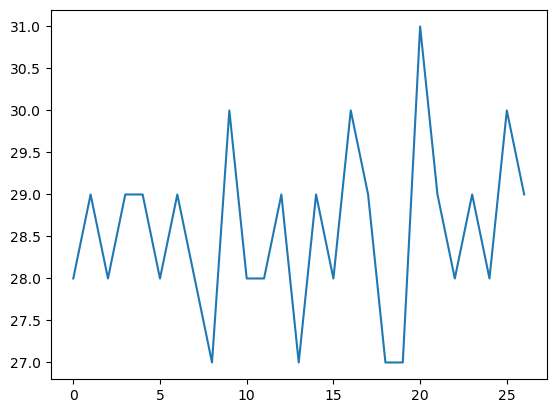

In [6]:
import matplotlib.pyplot as plt
plt.plot(dataset1)

In [7]:
result = adfuller(dataset1)
print(result[0])
print(result[1])

-5.385652262536516
3.630337581384736e-06


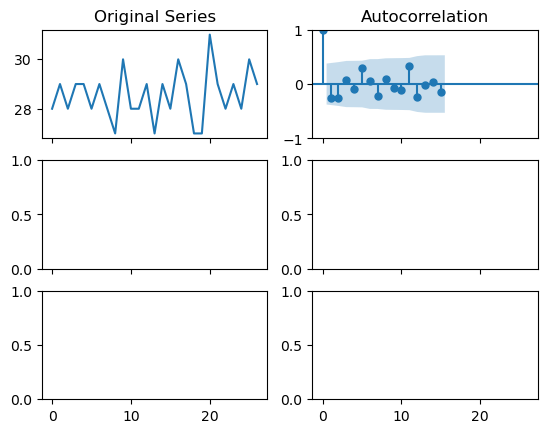

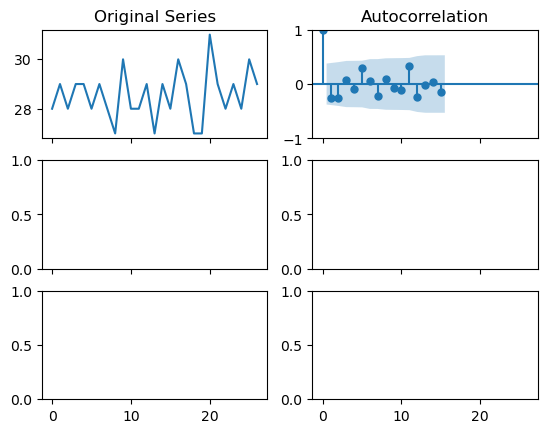

In [8]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(dataset1); axes[0, 0].set_title('Original Series')
plot_acf(dataset1, ax=axes[0, 1])


C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


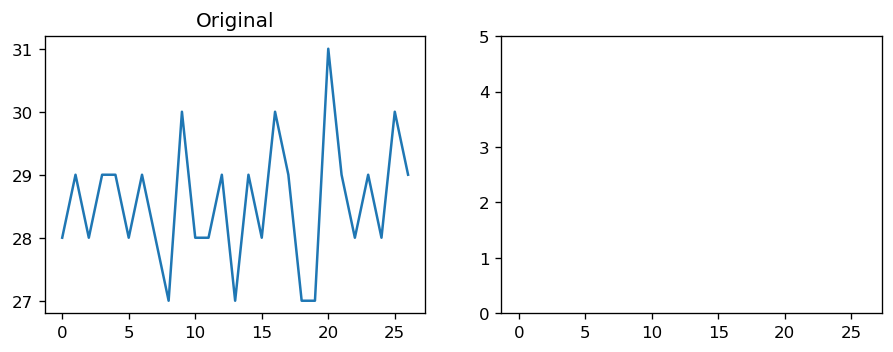

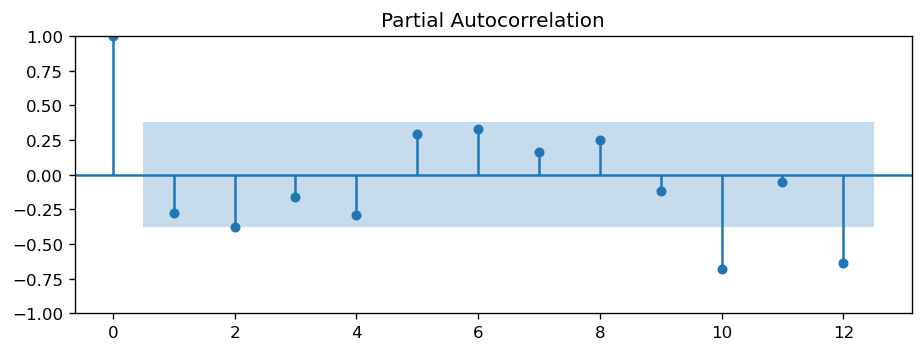

In [9]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(dataset1); axes[0].set_title('Original')
axes[1].set(ylim=(0,5))
plot_pacf(dataset1,lags=12)

plt.show()

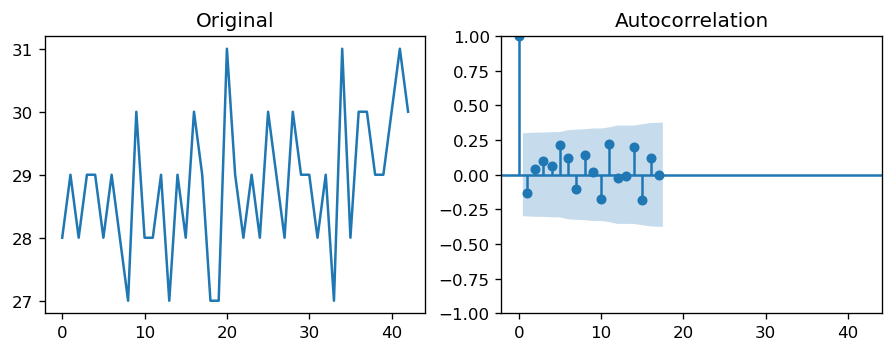

In [10]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(dataset); axes[0].set_title('Original')
axes[1].set(ylim=(0,1.2))
plot_acf(dataset, ax=axes[1])

plt.show()

In [11]:
import statsmodels.api as sm

model = sm.tsa.arima.ARIMA(dataset1, order=(10,0,0))
model_fit = model.fit()
print(model_fit.summary())

                                                               SARIMAX Results                                                                
Dep. Variable:     Your average cycle length (after how many days your period reoccur) example: 28,30   No. Observations:                   27
Model:                                                                                ARIMA(10, 0, 0)   Log Likelihood                 -28.569
Date:                                                                                Thu, 09 Feb 2023   AIC                             81.139
Time:                                                                                        12:11:26   BIC                             96.689
Sample:                                                                                             0   HQIC                            85.763
                                                                                                 - 27                                         

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [12]:
a = np.zeros(37, dtype=int)
for i in range(model_fit.predict().shape[0]):
    a[i] = round(model_fit.predict()[i])

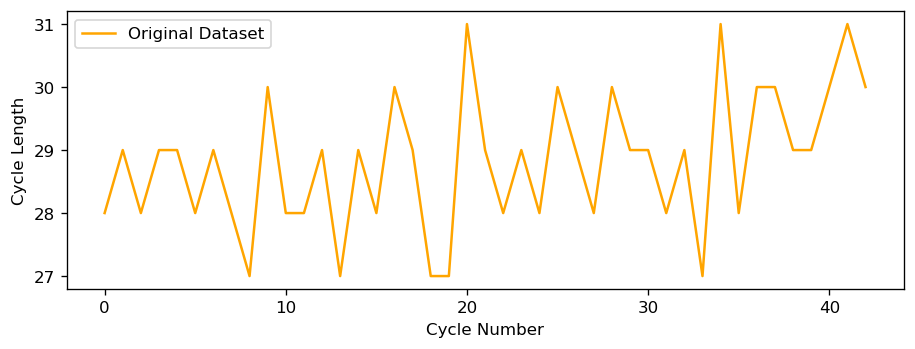

In [13]:
#plt.plot(a,label="Model Prediction",color='blue')
plt.plot(dataset,label="Original Dataset",color="orange")
plt.xlabel("Cycle Number")
plt.ylabel("Cycle Length")
plt.legend(loc="best")

In [14]:
test = dataset.iloc[27:]
test

27    28
28    30
29    29
30    29
31    28
32    29
33    27
34    31
35    28
36    30
37    30
38    29
39    29
40    30
41    31
42    30
Name: Your average cycle length (after how many days your period reoccur) example: 28,30, dtype: int64

In [15]:
start = len(dataset1)
end = len(dataset1)+len(test)-1
pred = model_fit.predict(start=start,end=end)
print(np.rint(pred))

27    29.0
28    30.0
29    28.0
30    28.0
31    30.0
32    29.0
33    29.0
34    28.0
35    28.0
36    30.0
37    29.0
38    28.0
39    29.0
40    28.0
41    28.0
42    29.0
Name: predicted_mean, dtype: float64


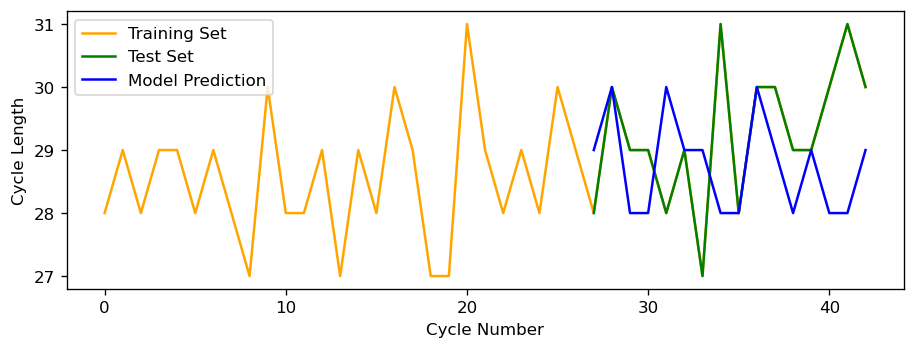

In [18]:
plt.plot(dataset,label="Training Set",color="orange")
plt.plot(test,label="Test Set",color="green")
plt.plot(np.rint(pred),label="Model Prediction",color='blue')
plt.xlabel("Cycle Number")
plt.ylabel("Cycle Length")
plt.legend(loc="best")